<a href="https://colab.research.google.com/github/luongdiem2005/movie-ratings-analysis/blob/main/notebook/p6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

Top 10 movies with the most ratings: 
movieId  title                             
356      Forrest Gump                          329
318      Shawshank Redemption, The             317
296      Pulp Fiction                          307
593      Silence of the Lambs, The             279
2571     Matrix, The                           278
260      Star Wars: Episode IV - A New Hope    251
480      Jurassic Park                         238
110      Braveheart                            237
589      Terminator 2: Judgment Day            224
527      Schindler's List                      220
Name: rating, dtype: int64


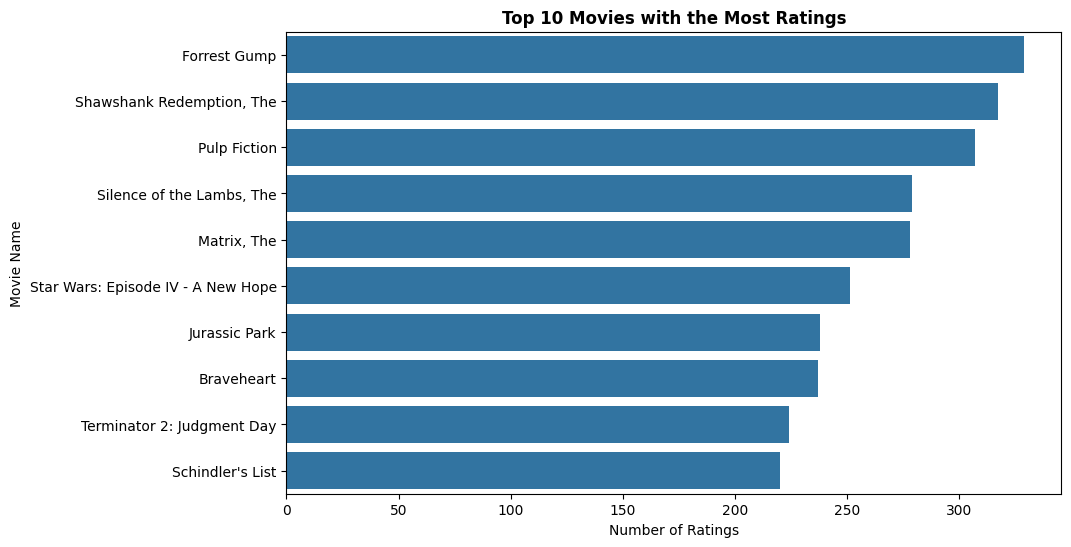


Top 10 movies with highest average ratings: 
                                                                mean  count
movieId title                                                              
318     Shawshank Redemption, The                           4.429022    317
2959    Fight Club                                          4.272936    218
50      Usual Suspects, The                                 4.237745    204
260     Star Wars: Episode IV - A New Hope                  4.231076    251
527     Schindler's List                                    4.225000    220
1196    Star Wars: Episode V - The Empire Strikes Back      4.215640    211
1198    Raiders of the Lost Ark (Indiana Jones and the ...  4.207500    200
296     Pulp Fiction                                        4.197068    307
2571    Matrix, The                                         4.192446    278
356     Forrest Gump                                        4.164134    329


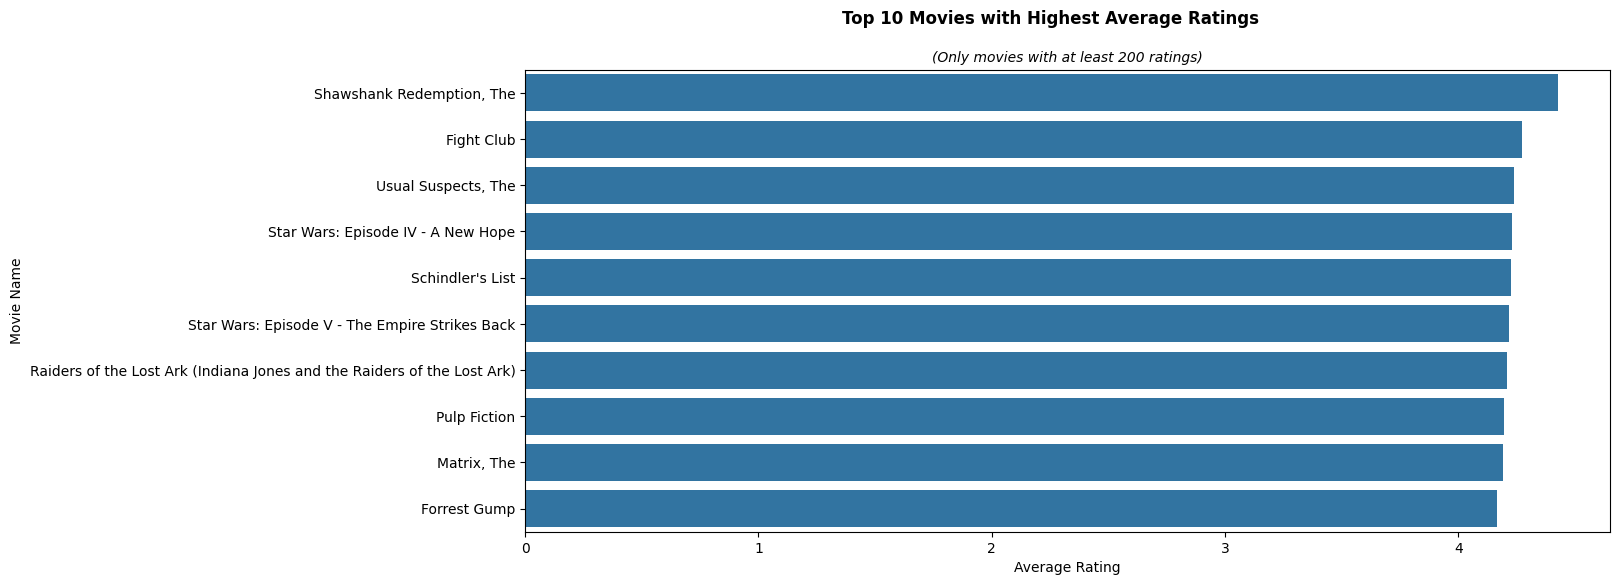

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
base = "/content/drive/MyDrive/projects/movie-ratings-analysis"
movies = pd.read_csv(f"{base}/data/clean_movies.csv")
movies['year'] = movies['year'].astype('Int64')
ratings = pd.read_csv(f"{base}/data/clean_ratings.csv")

df = ratings.merge(movies, on="movieId")

# Top movies with the most ratings
top_count = df.groupby(['movieId', 'title'])['rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 movies with the most ratings: ")
print(top_count)
plt.figure(figsize=(10,6))
sns.barplot(x=top_count.values, y=top_count.index.get_level_values('title'))
plt.title("Top 10 Movies with the Most Ratings", fontweight="bold")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Name")
plt.show()

# Top movies with highest average ratings
movie_stats = df.groupby(['movieId', 'title'])['rating'].agg(['mean', 'count'])
top_mean = movie_stats[movie_stats['count'] >= 200].sort_values('mean', ascending=False).head(10)
print("\nTop 10 movies with highest average ratings: ")
print(top_mean)
plt.figure(figsize=(14,6))
sns.barplot(x=top_mean['mean'], y=top_mean.index.get_level_values('title'))
plt.title("(Only movies with at least 200 ratings)", fontsize=10, fontstyle="italic")
plt.suptitle("Top 10 Movies with Highest Average Ratings", fontweight="bold")
plt.xlabel("Average Rating")
plt.ylabel("Movie Name")
plt.show()


